In [49]:
## DR ONLY


import pandas as pd
import seaborn as sns
import os
import glob as glob
import matplotlib.pyplot as plt


import pickle as pickle
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
from markov_simulator_dynamic_14March23_Jax_deep import Markov_fit
from markov_simulator_dynamic_14March23_Jax_deep import make_extent
ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D54A4"]


In [76]:
results = glob.glob(os.path.join("results/*"))


In [77]:
dfs_ = list()

for r in results:

    files = list(glob.glob(os.path.join(r,"*")))
    files.sort(key=os.path.getmtime, reverse=True)
    d = pd.read_csv(glob.glob(os.path.join(files[0],"results/residuals.csv"))[0]).sort_values("residual")
    d['hyp'] = r.split("/")[1]
    dfs_.append(d)

df = pd.concat(dfs_)

In [78]:
#Trim hypothesis
df = df.loc[~df['hyp'].isin(["Free_1", "Free_2", "Free_3"])]

In [79]:
df_best = list()

for i in df.hyp.unique():
        z = df.loc[df['hyp']==i]
        z.sort_values('residual')
        df_best.append(z[0:1])
        
df_best = pd.concat(df_best)

In [80]:
hypo_ = pd.read_csv("Hypothesis.csv")
hypo_['hyp'] = hypo_['Topology_Name']
#df_best = pd.merge(df_best, hypo, how='left', on='hyp')
hypo = hypo_[['Topology_number', 'hyp','Convergence_dir']]

In [97]:
hypo_

,Topology_Name,States,Transitions,State_Comp,Data_Comp,Topology_number,Convergence_dir,hyp,par_num
0,Direct_1,"P,E,M,A","P->M,P->E,P->A","A,E,M","A,E,M",T1,NaN,Direct_1,15
1,Direct_2,"P,E,M,A,X","P->M,P->E,P->A,P->X","A,E,M","A,E,M",T2,NaN,Direct_2,20
2,Direct_3,"P,E,M,A","P->M,P->E,P->A,M->P,E->P,A->P","A,E,M","A,E,M",T3,NaN,Direct_3,30
3,Direct_4,"P,E,M,A,X","P->M,P->E,P->A,P->X,M->P,E->P,A->P,X->P","A,E,M","A,E,M",T4,NaN,Direct_4,40
4,MEclassic_1,"P,E,M,A,ME","P->ME,P->A,ME->M,ME->E","A,E,M","A,E,M",T5,NaN,MEclassic_1,20
5,MEclassic_2,"P,E,M,A,ME","P->ME,P->A,ME->M,ME->E,M->E","A,E,M","A,E,M",T6,M->E,MEclassic_2,25
6,MEclassic_3,"P,E,M,A,ME","P->ME,P->A,ME->M,ME->E,E->M","A,E,M","A,E,M",T7,E->M,MEclassic_3,25
7,MEclassic_4,"P,E,M,A,ME","P->ME,P->A,ME->M,M->E","A,E,M","A,E,M",T8,M->E,MEclassic_4,20
8,MEclassic_5,"P,E,M,A,ME","P->ME,P->A,ME->E,E->M","A,E,M","A,E,M",T9,NaN,MEclassic_5,20
9,MEclassic_6,"P,E,M,A,ME,X","P->ME,P->A,ME->M,ME->E,P->X","A,E,M","A,E,M",T10,NaN,MEclassic_6,25


In [82]:
hypo_['par_num'] = [len(i)*5 for i in hypo_['Transitions'].str.split(',')]

num_params_dict = dict(zip(hypo_['hyp'], hypo_['par_num']))

In [83]:
def calculate_aic(rss, num_params, num_observations):
    """
    Calculate AIC based on residual sum of squares (RSS), number of parameters, and number of observations.
    
    :param rss: Residual Sum of Squares (RSS) for the model
    :param num_params: Number of parameters in the model
    :param num_observations: Number of observations (residuals)
    :return: AIC value
    """
    return 2 * num_params + num_observations * np.log(rss / num_observations)


# Group by model hypothesis and calculate AIC for each model
aic_results = []

for hyp, group in df_best.groupby('hyp'):
    rss = group['residual'].values
    num_observations = 25
    num_params = num_params_dict.get(hyp, None)  # Get number of parameters for the model hypothesis

    if num_params is not None:
        aic_value = calculate_aic(rss, num_params, num_observations)
        aic_results.append({'hyp': hyp, 'AIC': aic_value[0], 'N_params': num_params})

# Convert results to DataFrame for easy viewing
aic_df = pd.DataFrame(aic_results)


In [85]:
aic_df["Topology_Name"] = aic_df["hyp"]
df_best["Topology_Name"] = df_best["hyp"]

In [86]:
df_best = df_best[['Topology_Name','residual']].merge(aic_df, on='Topology_Name', how='left')
df_best = hypo_[['Topology_Name','Topology_number']].merge(df_best, on='Topology_Name', how='left')

# Removing 'T' from each element
stripped_list = [item.lstrip('T') for item in df_best['Topology_number']]
number_list = [int(num) for num in stripped_list]

df_best['Topology_num'] = number_list

df_best = df_best.loc[df_best['Topology_num']<=38]

In [87]:
df_best = df_best.sort_values('residual', ascending=False)

df_best.loc[(df_best['residual']<=0.022725), 'hit'] = 'hit'
df_best.loc[(df_best['residual']>=0.022725), 'hit'] = 'not hit'

Text(0, 0.5, 'residual')

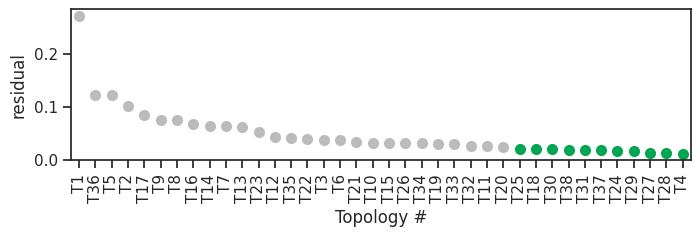

In [88]:
plt.figure(figsize=(8,2), dpi=100)


ax=sns.stripplot(data=df_best, x='Topology_number', y='residual', edgecolor = "white", hue='hit',
size = 8, jitter = 0, zorder = 1, alpha=1, order=list(df_best['Topology_number']), palette=[ingeo_colours[6],'#00A651'])


#plt.grid()  #just add this

plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("residual")
#plt.savefig("residuals.pdf")

In [89]:
df_best = df_best.sort_values('AIC', ascending=False)
df_best['hit'] = 'not hit'
# Set last 5 rows to "hit"
df_best.loc[df_best.tail(5).index, 'hit'] = 'hit'

Text(0, 0.5, 'AIC')

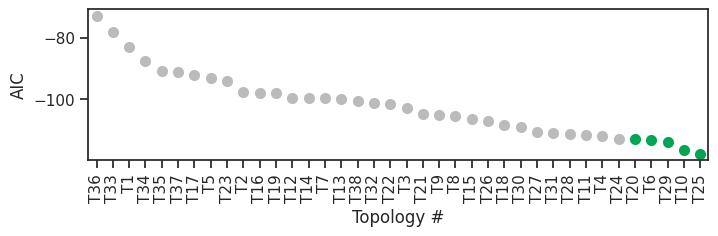

In [90]:
plt.figure(figsize=(8,2), dpi=100)


ax=sns.stripplot(data=df_best, x='Topology_number', y='AIC', edgecolor = "white", hue='hit',
size = 8, jitter = 0, zorder = 1, alpha=1, order=list(df_best['Topology_number']), palette=[ingeo_colours[6],'#00A651'])


#plt.grid()  #just add this

plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("AIC")
#plt.savefig("residuals_AIC.pdf")

In [104]:
list(df_best['Topology_number'])

['T36',
 'T33',
 'T1',
 'T34',
 'T35',
 'T37',
 'T17',
 'T5',
 'T23',
 'T2',
 'T16',
 'T19',
 'T12',
 'T14',
 'T7',
 'T13',
 'T38',
 'T32',
 'T22',
 'T3',
 'T21',
 'T9',
 'T8',
 'T15',
 'T26',
 'T18',
 'T30',
 'T27',
 'T31',
 'T28',
 'T11',
 'T4',
 'T24',
 'T20',
 'T6',
 'T29',
 'T10',
 'T25']

In [105]:
#df = df.reset_index()
index_2 = list(df.index)

df['index_2'] = index_2

In [112]:
df_best

,Topology_Name,Topology_number,residual,hyp,AIC,N_params,Topology_num,hit
35,MultipleE_4,T36,0.122110,MultipleE_4,-73.042752,30,36,not hit
32,MultipleE_1,T33,0.029859,MultipleE_1,-78.253807,45,33,not hit
0,Direct_1,T1,0.271049,Direct_1,-83.108294,15,1,not hit
33,MultipleE_2,T34,0.030799,MultipleE_2,-87.479076,40,34,not hit
34,MultipleE_3,T35,0.040174,MultipleE_3,-90.835080,35,35,not hit
36,MultipleM_1,T37,0.017760,MultipleM_1,-91.241424,45,37,not hit
16,MEandDirect_3,T17,0.084578,MEandDirect_3,-92.223904,25,17,not hit
4,MEclassic_1,T5,0.122102,MEclassic_1,-93.044269,20,5,not hit
22,MEandDirect_9,T23,0.053021,MEandDirect_9,-93.898653,30,23,not hit
1,Direct_2,T2,0.101599,Direct_2,-97.639910,20,2,not hit


In [113]:
import numpy as np
import pandas as pd

def calculate_aic(rss, num_params, num_observations):
    """
    Calculate AIC based on residual sum of squares (RSS), number of parameters, and number of observations.
    
    :param rss: Residual Sum of Squares (RSS) for the model
    :param num_params: Number of parameters in the model
    :param num_observations: Number of observations (residuals)
    :return: AIC value
    """
    return 2 * num_params + num_observations * np.log(rss / num_observations)

# Assuming 'df' contains the main data (residuals, etc.) and 'df_best' contains the model info like N_params

# Merge 'df' with 'df_best' on 'hyp' (model name) to get 'N_params'
merged_df = pd.merge(df, df_best[['hyp', 'N_params']], on='hyp', how='left')

# List to hold AIC results
aic_results = []

# Loop through the entire merged DataFrame and calculate AIC for each row
for _, row in merged_df.iterrows():
    hyp = row['hyp']  # Model hypothesis for the current row
    rss = row['residual']  # Residual sum of squares (RSS) for the current row
    num_observations = 25  # Assuming 25 observations per model (adjust as needed)
    num_params = row['N_params']  # Get the number of parameters from the merged DataFrame

    # Calculate the AIC for the current row
    if num_params is not None:  # Ensure there is a valid 'num_params'
        aic_value = calculate_aic(rss, num_params, num_observations)
        
        # Append the result to the aic_results list
        aic_results.append({
            'hyp': hyp,
            'AIC': aic_value,
            'N_params': num_params,
            'index': row['index']
        })

# Convert the results list to a DataFrame for easy viewing
aic_df = pd.DataFrame(aic_results)

# Display the resulting AIC DataFrame (optional)
print(aic_df.head())  # Show the first few rows of the AIC results

           hyp  AIC  N_params  index
0  MultipleM_4  NaN       NaN    435
1  MultipleM_4  NaN       NaN     53
2  MultipleM_4  NaN       NaN    647
3  MultipleM_4  NaN       NaN    545
4  MultipleM_4  NaN       NaN    817


In [114]:
df_merged = pd.merge(aic_df, hypo_[['hyp', 'Topology_number']], on='hyp', how='left')

In [115]:
df_merged

,hyp,AIC,N_params,index,Topology_number
0,MultipleM_4,NaN,NaN,435,T40
1,MultipleM_4,NaN,NaN,53,T40
2,MultipleM_4,NaN,NaN,647,T40
3,MultipleM_4,NaN,NaN,545,T40
4,MultipleM_4,NaN,NaN,817,T40
...,...,...,...,...,...
41995,MEclassic_6,-83.144953,25.0,608,T10
41996,MEclassic_6,-83.112657,25.0,256,T10
41997,MEclassic_6,-83.065390,25.0,245,T10
41998,MEclassic_6,-83.061345,25.0,963,T10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


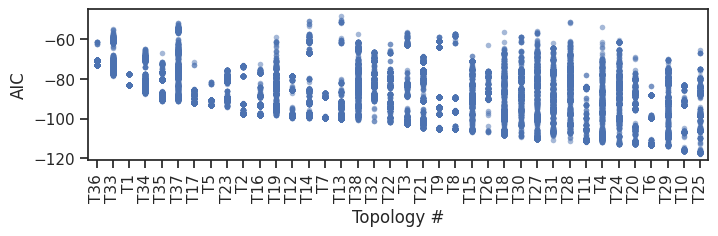

In [118]:
plt.figure(figsize=(8,2), dpi=100)


sns.set_theme(style="ticks")

ax=sns.stripplot(data=df_merged, x='Topology_number', y='AIC', edgecolor = "white",
size = 4, jitter = 0, zorder = 1, alpha=0.5, order=list(df_best['Topology_number']))

plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("AIC")

plt.savefig("residuals_AIC_1000.pdf", dpi=1000)

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create the plot
plt.figure(figsize=(8, 2), dpi=100)

ax = sns.stripplot(data=df_merged, x='Topology_number', y='AIC', edgecolor="white",
                   size=4, jitter=0, zorder=1, alpha=0.5, order=list(df_best['Topology_number']))

# Remove the legend
plt.legend().remove()

# Remove the axis lines, ticks, and labels completely
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels
ax.set_xlabel("")  # Ensure x-axis label is empty
ax.set_ylabel("")  # Ensure y-axis label is empty


# Remove gridlines if they exist
ax.grid(False)

# Save the plot with a white background and no axis lines, labels, or ticks
plt.savefig("residuals_AIC_1000_noborder.png", dpi=1000, bbox_inches='tight', pad_inches=0.1)

# Close the plot to free up memory
plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [22]:
#plt.figure(figsize=(8,2), dpi=100)


#sns.set_theme(style="ticks")
## Stripplot and Boxplot


#ax=sns.stripplot(data=df, x='Topology_number', y='residual', edgecolor = "white",
#size = 4, jitter = 0, zorder = 1, alpha=0.3).set(yscale="log")

In [23]:
aic_df

,hyp,AIC,N_params,Topology_number
0,MultipleM_4,-73.038948,30,T40
1,MultipleM_4,-73.037240,30,T40
2,MultipleM_4,-73.037067,30,T40
3,MultipleM_4,-73.037060,30,T40
4,MultipleM_4,-73.036796,30,T40
...,...,...,...,...
995,MultipleM_4,-62.179601,30,T40
996,MultipleM_4,-61.516939,30,T40
997,MultipleM_4,-61.488931,30,T40
998,MultipleM_4,-61.432196,30,T40


In [24]:
df_best = df_best.reset_index()

In [25]:
cost_dynamic_list = list()

for s in range(0, len(df_best.hyp)):
    print(s)
    sim = df_best.loc[df_best.index == s]
    sim = sim.reset_index()
    sim_name = sim.hyp

    
    path = glob.glob(os.path.join('results', sim_name[0], '*',f'{sim_name[0]}_fit_full'))
    file = open(path[0], 'rb')
    # dump information to that file
    markov_fit = pickle.load(file)
    

    
    chosen_initialisation_index = sim.level_0[0]
    sP = markov_fit.sP_opts[chosen_initialisation_index]

    _signalling_parameters = sP.reshape(5,-1)
    signalling_parameters = np.zeros((5,_signalling_parameters.shape[1]))
    signalling_parameters[:3] = _signalling_parameters[:3]
    signalling_parameters[4] = _signalling_parameters[3]
    mrkvS = markov_fit.mrkvSs[chosen_initialisation_index]
    mrkvS.signalling_parameters = signalling_parameters
    mrkvS.make_transition_matrices()
    mrkvS.make_transition_matrices_dynamic()

    mrkvS.simulate()
    mrkvS.simulate_dynamic()
    
    s_solve_dynamic = mrkvS.s_solve_dynamic.reshape(mrkvS.s_solve_dynamic.shape[0],mrkvS.D_init.shape[0],-1)
    s_solve = mrkvS.s_solve.reshape(mrkvS.s_solve.shape[0],mrkvS.D.shape[0],-1)

    total_proportions = {}
    for data_name in markov_fit.data_names:
        total_proportions[data_name] = np.zeros_like(mrkvS.final_vals[0])
    for state_name in markov_fit.state_names:
        total_proportions[markov_fit.dictionary[state_name]] += mrkvS.final_vals[mrkvS.markov.states.index(state_name)]

    total_proportions_dynamic = {}
    for data_name in markov_fit.data_names:
        total_proportions_dynamic[data_name] = np.zeros_like(mrkvS.final_vals_dynamic[0])
    for state_name in markov_fit.state_names:
        total_proportions_dynamic[markov_fit.dictionary[state_name]] += mrkvS.final_vals_dynamic[
            mrkvS.markov.states.index(state_name)]

    cost_dynamic = 0
    for key, val in total_proportions_dynamic.items():
        cost_dynamic += (np.abs(val - markov_fit.df_dynamic[key].values / 100) ** 2).sum()

    cost_dynamic_list.append(cost_dynamic)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [26]:
df_best['residual_dynamic'] = cost_dynamic_list

In [27]:
order = df_best.sort_values('residual_dynamic')['Topology_number']
df_best = df_best.sort_values('residual_dynamic', ascending=False)
df_best = df_best.reset_index()
df_best_hit = df_best.loc[df_best['hit']=='hit']

<ipython-input-28-770110f1ebd7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.stripplot(data=df_best_hit, x='Topology_number', y='residual_dynamic' , size = 8,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'residual')

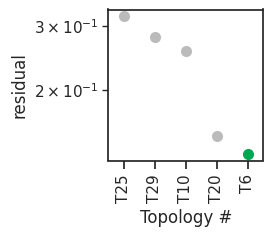

In [28]:

plt.figure(figsize=(2,2), dpi=100)


sns.set_theme(style="ticks")
## Stripplot and Boxplot

ax=sns.stripplot(data=df_best_hit, x='Topology_number', y='residual_dynamic' , size = 8, 
                palette=[ingeo_colours[6],ingeo_colours[6],ingeo_colours[6],ingeo_colours[6],'#00A651']).set(yscale="log")

plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("residual")

In [29]:
def calculate_aic(rss, num_params, num_observations):
    """
    Calculate AIC based on residual sum of squares (RSS), number of parameters, and number of observations.
    
    :param rss: Residual Sum of Squares (RSS) for the model
    :param num_params: Number of parameters in the model
    :param num_observations: Number of observations (residuals)
    :return: AIC value
    """
    return 2 * num_params + num_observations * np.log(rss / num_observations)


# Group by model hypothesis and calculate AIC for each model
aic_results = []

for hyp, group in df_best.groupby('hyp'):
    rss = group['residual_dynamic'].values
    num_observations = 33
    num_params = num_params_dict.get(hyp, None)  # Get number of parameters for the model hypothesis

    if num_params is not None:
        aic_value = calculate_aic(rss, num_params, num_observations)
        aic_results.append({'Topology_Name': hyp, 'AIC_dynamic': aic_value[0], 'N_params': num_params})

# Convert results to DataFrame for easy viewing
aic_df_dynamic = pd.DataFrame(aic_results)

In [30]:
df_best = df_best.merge(aic_df_dynamic, on='Topology_Name', how='left')
df_best = df_best.sort_values(["AIC_dynamic"], ascending=False)

In [31]:
df_best_hit = df_best.loc[df_best['hit']=='hit']

In [32]:
df_best_hit

,level_0,index,Topology_Name,Topology_number,residual,hyp,AIC,N_params_x,Topology_num,hit,residual_dynamic,AIC_dynamic,N_params_y
10,35,28,MEandDirect_15,T29,0.016068,MEandDirect_15,-113.745462,35,29,hit,0.279339,-87.470640,35
6,37,24,MEandDirect_11,T25,0.020564,MEandDirect_11,-117.577486,30,25,hit,0.317879,-93.205524,30
11,36,9,MEclassic_6,T10,0.032106,MEclassic_6,-116.439499,25,10,hit,0.254600,-110.530745,25
27,33,19,MEandDirect_6,T20,0.024712,MEandDirect_6,-112.983844,30,20,hit,0.149175,-118.171758,30
30,34,5,MEclassic_2,T6,0.036460,MEclassic_2,-113.260057,25,6,hit,0.133269,-131.892357,25


<ipython-input-43-3006df7e191c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.stripplot(data=df_best_hit, x='Topology_number', y='AIC_dynamic' , size = 12,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


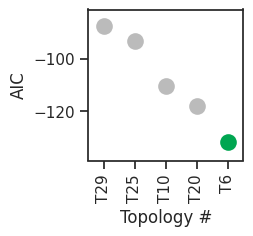

In [43]:
plt.figure(figsize=(2,2), dpi=100)


sns.set_theme(style="ticks")
## Stripplot and Boxplot

ax=sns.stripplot(data=df_best_hit, x='Topology_number', y='AIC_dynamic' , size = 12, 
                palette=[ingeo_colours[6],ingeo_colours[6],ingeo_colours[6],ingeo_colours[6],'#00A651']).set(ylim=(-139,-81))
plt.xticks(rotation=90)
plt.legend().remove()
plt.xlabel("Topology #")
plt.ylabel("AIC")
plt.savefig("AIC_VALIDATE.pdf")